(256, 256)


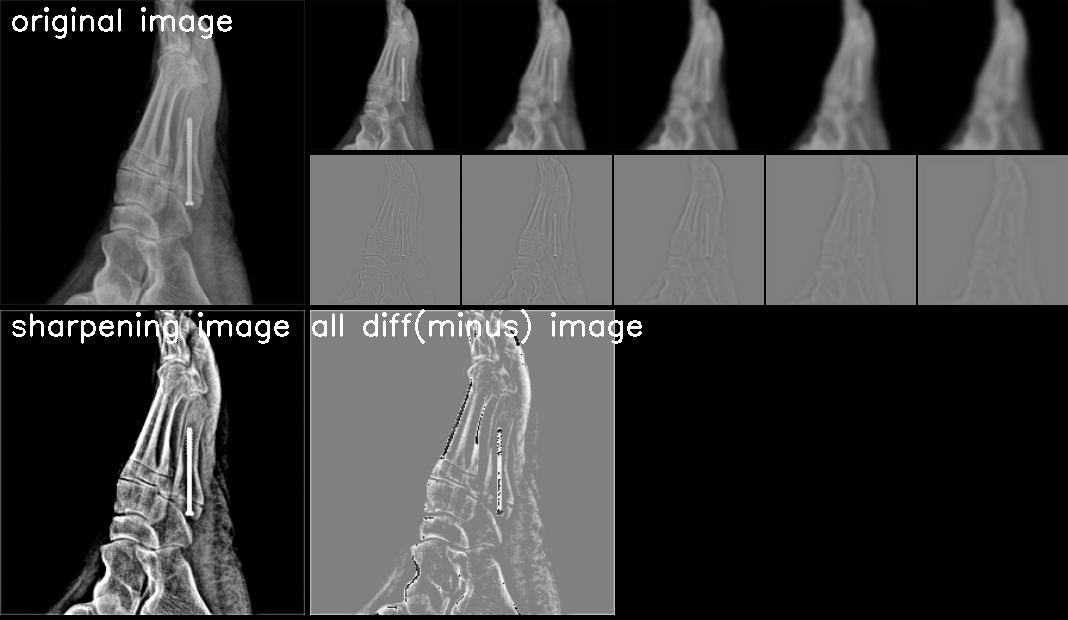

In [56]:
'''
1.이미지 파일 불러오기
2.이미지를 실수로 변환하여 smooth로 전환
3.전환한 smooth를 차영상으로 만들어주기
4.smooth이미지를 smoothing로 uint8, resize로 변환 해주고 이미지 출력
5.차영상(diff)를 minus이미지로 uint8, resize로 변환 해주고 이미지 출력
6.전체 배경화면(all)만들어주고 resize한 이미지를 all에 넣어주기
7.모든 diff를 합쳐서 sharp영상 만들고 uint, resize로 변환 해주고 all에 넣고 이미지 출력
'''
#-*- coding: utf-8 -*- -#

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

image=cv2.imread("/content/drive/MyDrive/python/data/의료영상데이타/foot.bmp", cv2.IMREAD_GRAYSCALE)

w=image.shape[1] #328
h=image.shape[0] #328

print(image.shape)

# gaussian smoothing
f_img = np.float32(image)
smooth1 = cv2.GaussianBlur(f_img, (5, 5), 0, 0) #표준편차
smooth2 = cv2.GaussianBlur(f_img, (11, 11), 0, 0)
smooth3 = cv2.GaussianBlur(f_img, (17, 17), 0, 0)
smooth4 = cv2.GaussianBlur(f_img, (23, 23), 0, 0)
smooth5 = cv2.GaussianBlur(f_img, (29, 29), 0, 0)

# smooth는 실수값을 가지므로 8비트 unsigned int 로 변환 후 display
'''smoothing = np.zeros((h,w), dtype=np.uint8) #view1 -> smoothing
smoothing = np.uint8(smooth)'''

# 차영상, uint8로 변환하여 보기
diff1 = f_img - smooth1
diff2 = smooth1 - smooth2
diff3 = smooth2 - smooth3
diff4 = smooth3 - smooth4
diff5 = smooth4 - smooth5

minus1 = np.uint8((diff1+128)) #diffd -> minus
minus2 = np.uint8((diff2+128))
minus3 = np.uint8((diff3+128))
minus4 = np.uint8((diff4+128))
minus5 = np.uint8((diff5+128))


#영상보기
all = np.zeros((620,1068), np.uint8) #영상 전체 검은배경

#원본영상
imaged = cv2.resize(image,(305,305))
all[0:305,0:305] = imaged #원본이미지

#smoothing 이미지
smoothing1 = cv2.resize(smooth1,(150,150))
smoothing2 = cv2.resize(smooth2,(150,150))
smoothing3 = cv2.resize(smooth3,(150,150))
smoothing4 = cv2.resize(smooth4,(150,150))
smoothing5 = cv2.resize(smooth5,(150,150))

all[0:150, 310:460] = smoothing1
all[0:150, 462:612] = smoothing2
all[0:150, 614:764] = smoothing3
all[0:150, 766:916] = smoothing4
all[0:150, 918:1068] = smoothing5

#차영상 resize
minus1 = cv2.resize(minus1,(150,150))
minus2 = cv2.resize(minus2,(150,150))
minus3 = cv2.resize(minus3,(150,150))
minus4 = cv2.resize(minus4,(150,150))
minus5 = cv2.resize(minus5,(150,150))

all[155:305, 310:460] = minus1
all[155:305, 462:612] = minus2
all[155:305, 614:764] = minus3
all[155:305, 766:916] = minus4
all[155:305, 918:1068] = minus5

#enhance(sharpening) 이미지
sharp = f_img + 3 * (diff1 + diff2 + diff3 + diff4 + diff5)
sharp = np.clip(sharp, 0, 255)
sharpen = np.uint8(sharp) #view->sharpen
sharpen = cv2.resize(sharpen,(305,305))
all[310:615, 0:305] = sharpen

#smoothing(diff,minus) 이미지 모두 합한 결과 이미지
allsmth = 3 * (diff1 + diff2 + diff3 + diff4 + diff5)
allsmth = np.clip(allsmth, 0, 255)
allsmth = np.uint8((allsmth + 128))
allsmth = cv2.resize(allsmth, (305,305))
all[310:615, 310:615] = allsmth

#텍스트 삽입
cv2.putText(all,'original image', (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
cv2.putText(all,'sharpening image', (10,335), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
cv2.putText(all,'all diff(minus) image', (310,335), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)

cv2_imshow(all)